<a href="https://colab.research.google.com/github/AfsanaBrishty/MyCodeSolves/blob/master/170104086.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Soft Comp Assignment3/Dataset 3.csv",encoding='latin1')
df

,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [4]:
df.shape

(10314, 2)

In [5]:
df = df.sample(frac = 1., random_state = 14).reset_index(drop = True)

print(df['sentiment'].value_counts(0))
df

0    8000
1    2314
Name: sentiment, dtype: int64


,tweets,sentiment
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


## **Test Train Data Divide**

In [6]:
EPOCH = 10
split_val = int(0.2 * df.shape[0])

Test_data = df.iloc[-split_val :]
Val_data = df.iloc[- 2 * split_val : -split_val]
Train_data = df.iloc[: - 2 * split_val]

In [7]:
print(Train_data['sentiment'].value_counts())
Train_data

0    4784
1    1406
Name: sentiment, dtype: int64


,tweets,sentiment
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
6185,"free draw, lit easily, puffing away",0
6186,Depression is coming i feel it my veins just w...,1
6187,at gator joe's with heather and then movies to...,0
6188,Ughhh so over nightmares - So Instead of sleep...,0


In [8]:
print(Val_data['sentiment'].value_counts())
Val_data

0    1606
1     456
Name: sentiment, dtype: int64


,tweets,sentiment
6190,"@pilucha ok, no more drinking away of the sorr...",0
6191,Earl's wearing a tie,0
6192,Loving @gilesbennet teaching style - like Dr S...,0
6193,hangin with ledd nd court.,0
6194,under 24 hours left to vote for @protagonize a...,0
...,...,...
8247,Look at the cute hat I got today...I look scar...,0
8248,@firesty hey ya )) like ur new pic i have one...,0
8249,@Styla73 Thank you.,0
8250,@stephjonesmusic http://twitpic.com/6bclz - ah...,0


In [9]:
print(Test_data['sentiment'].value_counts())
Test_data

0    1610
1     452
Name: sentiment, dtype: int64


,tweets,sentiment
8252,One of my mini poems. #helenswriting#mentalhea...,1
8253,@y2kprawn you went to college here? Didn't kno...,0
8254,The Young Life Podcast #1 - Depression 101: h...,1
8255,'s hair is so soft today.,0
8256,At the point where I'm legitimately pissed whe...,1
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


In [10]:
Train_X = np.array(Train_data.iloc[:, 0])
Train_Y = np.array(Train_data.iloc[:, 1])

Validation_X = np.array(Val_data.iloc[:, 0])
Validation_Y = np.array(Val_data.iloc[:, 1])

Test_X = np.array(Test_data.iloc[:, 0])
Test_Y = np.array(Test_data.iloc[:, 1])

# **Data Tokenization**

In [11]:
top_k = 55000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  oov_token = "<unk>",
                                                  filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(Train_X)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

Train_seq = tokenizer.texts_to_sequences(Train_X)
Val_seq = tokenizer.texts_to_sequences(Validation_X)
Test_seq = tokenizer.texts_to_sequences(Test_X)

Train_seq = tf.keras.preprocessing.sequence.pad_sequences(Train_seq, padding = 'pre')
Val_seq = tf.keras.preprocessing.sequence.pad_sequences(Val_seq, padding = 'pre')
Test_seq = tf.keras.preprocessing.sequence.pad_sequences(Test_seq, padding = 'pre')

# **Model Development**

In [12]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.Bidirectional(layers.SimpleRNN(686, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(343, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(49, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(7, dropout = 0.2)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2072576   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 1372)        1118180   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 686)         1177176   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 98)          72128     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 14)                1484      
_________________________________________________________________
dense (Dense)                (None, 1)                 15        
Total params: 4,441,559
Trainable params: 4,441,559
Non-trainable params: 0
______________________________________________

Epoch 1/10
194/194 [==============================] - 330s 2s/step - loss: 0.5648 - accuracy: 0.7553 - val_loss: 0.5368 - val_accuracy: 0.7735
Epoch 2/10
194/194 [==============================] - 323s 2s/step - loss: 0.5474 - accuracy: 0.7640 - val_loss: 0.6380 - val_accuracy: 0.7721
Epoch 3/10
194/194 [==============================] - 323s 2s/step - loss: 0.5373 - accuracy: 0.7729 - val_loss: 0.6536 - val_accuracy: 0.7672
Epoch 4/10
194/194 [==============================] - 326s 2s/step - loss: 0.5391 - accuracy: 0.7729 - val_loss: 0.7036 - val_accuracy: 0.2211
Epoch 5/10
194/194 [==============================] - 321s 2s/step - loss: 0.5373 - accuracy: 0.7729 - val_loss: 0.8057 - val_accuracy: 0.2211
Epoch 6/10
194/194 [==============================] - 327s 2s/step - loss: 0.5300 - accuracy: 0.7729 - val_loss: 0.9177 - val_accuracy: 0.2672
Epoch 7/10
194/194 [==============================] - 322s 2s/step - loss: 0.5050 - accuracy: 0.7729 - val_loss: 1.0544 - val_accuracy: 0.3758

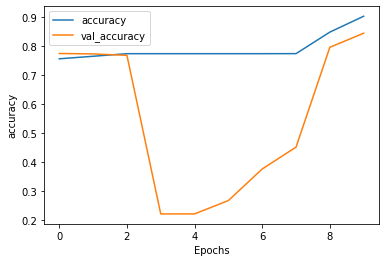

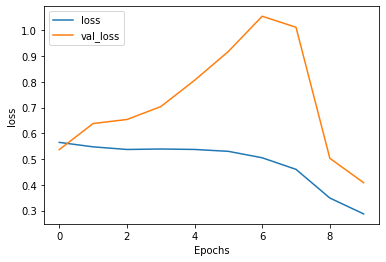


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.755250 	   0.564786 	   0.773521 	   0.536752
       2   0.763974 	   0.547449 	   0.772066 	   0.638022
       3   0.772859 	   0.537277 	   0.767216 	   0.653625
       4   0.772859 	   0.539106 	   0.221145 	   0.703556
       5   0.772859 	   0.537338 	   0.221145 	   0.805681
       6   0.772859 	   0.530030 	   0.267216 	   0.917694
       7   0.772859 	   0.505031 	   0.375849 	   1.054363
       8   0.773021 	   0.460087 	   0.451018 	   1.011558
       9   0.847173 	   0.348811 	   0.794859 	   0.503011
      10   0.901777 	   0.287144 	   0.843356 	   0.408324


In [13]:
history = model.fit(Train_seq, Train_Y, epochs = EPOCH, validation_data = (Val_seq, Validation_Y), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

# **Performance Visualization**

**For Training Data**

194/194 [==============================] - 69s 351ms/step - loss: 0.2423 - accuracy: 0.9186
Train Loss: 0.2423071712255478
Train Accuracy: 0.9185783267021179 (Model Metric)
Train Accuracy: 0.918578352180937 (sklearn Metric)
Train Precision: 0.8253968253968254
Train Recall: 0.813655761024182
Train F1-score: 0.8194842406876791


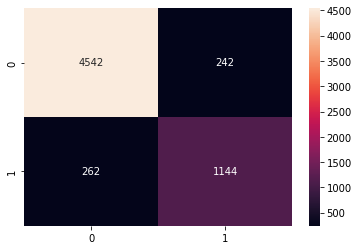

In [14]:
y_pred = model.predict(Train_seq)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(Train_seq, Train_Y, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(Train_Y, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(Train_Y, y_pred))
print('Train Recall:', recall_score(Train_Y, y_pred))
print('Train F1-score:', f1_score(Train_Y, y_pred))

sns.heatmap(confusion_matrix(Train_Y, y_pred), annot = True, fmt = 'g')

**For Validation Data**

65/65 [==============================] - 19s 290ms/step - loss: 0.4083 - accuracy: 0.8434
Validation Loss: 0.4083240330219269
Validation Accuracy: 0.8433559536933899 (Model Metric)
Validation Accuracy: 0.8433559650824443 (sklearn Metric)
Validation Precision: 0.6411889596602972
Validation Recall: 0.6622807017543859
Validation F1-score: 0.651564185544768


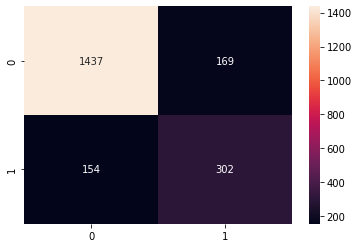

In [15]:
y_pred = model.predict(Val_seq)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(Val_seq, Validation_Y, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(Validation_Y, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(Validation_Y, y_pred))
print('Validation Recall:', recall_score(Validation_Y, y_pred))
print('Validation F1-score:', f1_score(Validation_Y, y_pred))

sns.heatmap(confusion_matrix(Validation_Y, y_pred), annot = True, fmt = 'g')

**For Testing Data**

65/65 [==============================] - 18s 268ms/step - loss: 0.5113 - accuracy: 0.8138
Test Loss: 0.5113445520401001
Test Accuracy: 0.8137730360031128 (Model Metric)
Test Accuracy: 0.8137730358874878 (sklearn Metric)
Test Precision: 0.58994708994709
Test Recall: 0.49336283185840707
Test F1-score: 0.5373493975903615


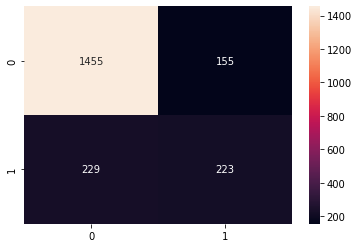

In [16]:
y_pred = model.predict(Test_seq)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(Test_seq, Test_Y, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(Test_Y, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(Test_Y, y_pred))
print('Test Recall:', recall_score(Test_Y, y_pred))
print('Test F1-score:', f1_score(Test_Y, y_pred))

sns.heatmap(confusion_matrix(Test_Y, y_pred), annot = True, fmt = 'g')

# **Result visualization in bar chart**

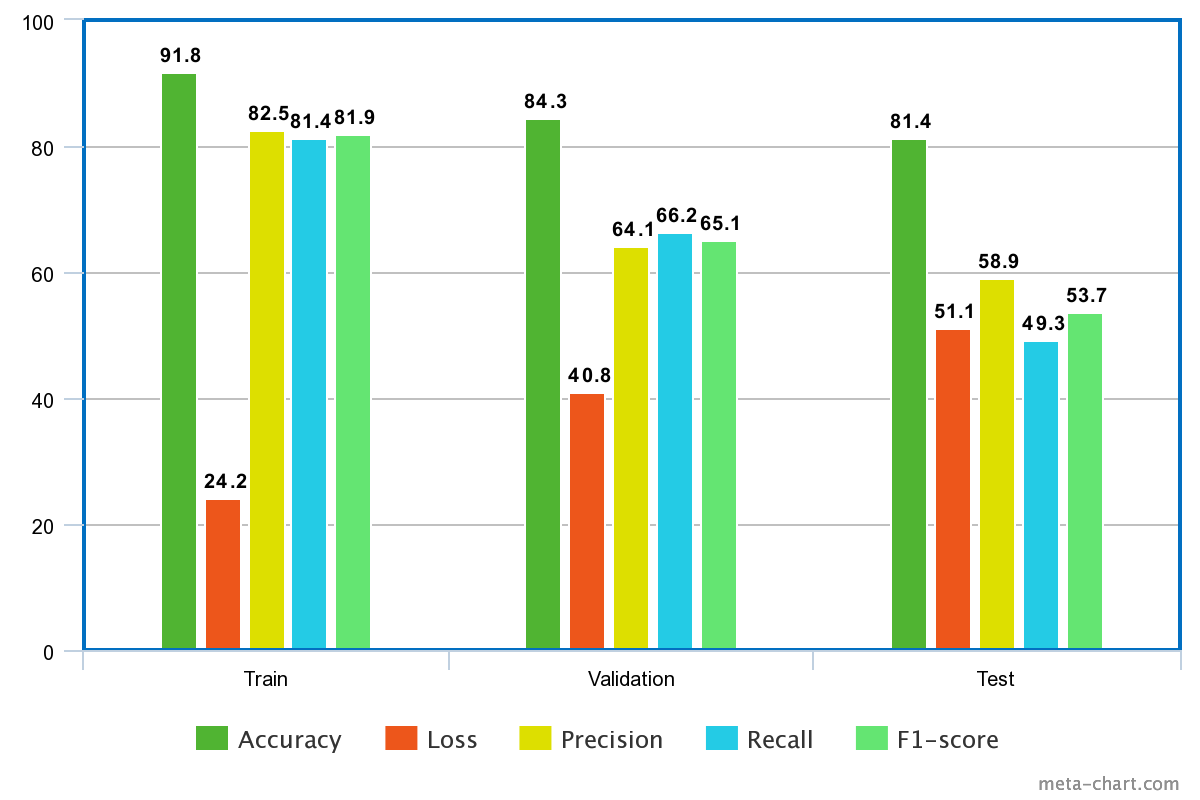